# Fraudlent transctions have been increasing rapidely from last few years. Making fraud detection is important as well as challenging. Despite countless efforts and human supervision, hundreds of millions are lost due to fraud. It can happen using various methods ie, stolen credit cards, misleading accounting, phishing emails, etc.Machine Learning helps to extrapolate and rapidely distinguished fraud and make quick move to reduce the loss.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
import os
os.chdir('E:\DATA\Assignments\INSAID')

In [4]:
data= pd.read_csv('Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#Check whether missing value present or not

In [6]:
data.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

# Did not find any missing value

In [7]:
data.rename(columns={'newbalanceOrig':'newbalanceOrg'},inplace=True)

In [8]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Analysis

Text(0, 0.5, 'Amount')

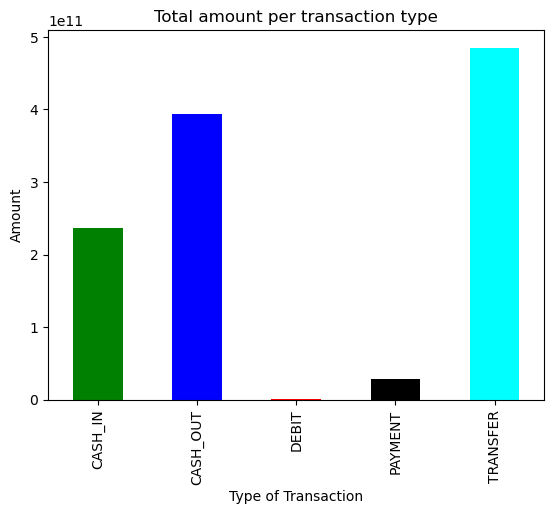

In [9]:
var = data.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar', color=['green','blue','red','black','cyan'])
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount')

<AxesSubplot:>

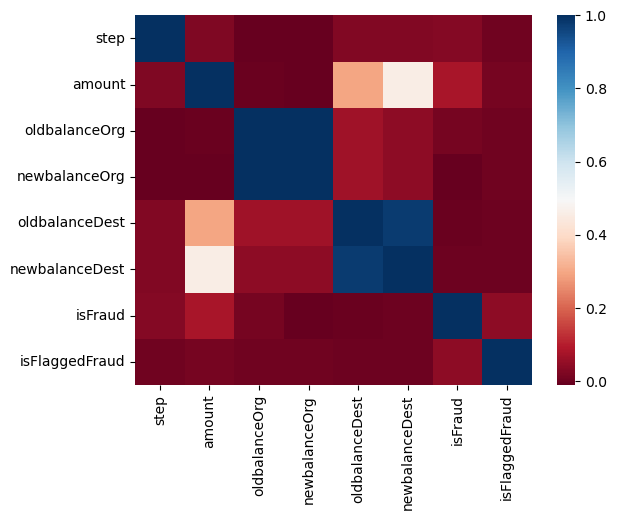

In [10]:
sns.heatmap(data.corr(),cmap='RdBu')

# Conclution from hitmap:

1.OldbalanceOrg and NewbalanceOrg are highly correlated. 2.OldbalanceDest and NewbalanceDest are highly correlated. 3.Amount is correlated with isFraud(Target Variable).


There is not much relation between the features, so we need to understand where the relationship between them depends on the type of transaction and amount. To do so, we need to see the heat map of fraud and nonfraud transactions differently.

In [11]:
fraud = data.loc[data.isFraud == 1]
nonfraud = data.loc[data.isFraud == 0]

<AxesSubplot:>

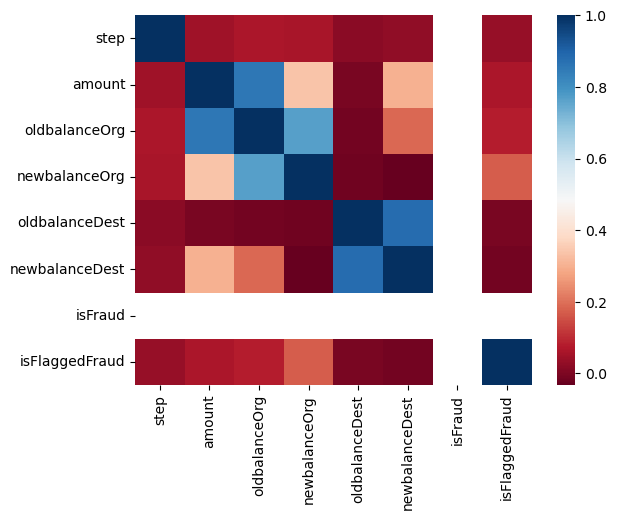

In [12]:
sns.heatmap(fraud.corr(),cmap='RdBu',)

There are 2 flags which stand out to me and it's interesting to look onto: isFraud and isFlaggedFraud column. From the hypothesis, isFraud is the indicator which indicates the actual fraud transactions whereas isFlaggedFraud is what the system prevents the transaction due to some thresholds being triggered. From the above heatmap we can see that there is some relation between other columns and isFlaggedFraud thus there must be relation between isFraud.

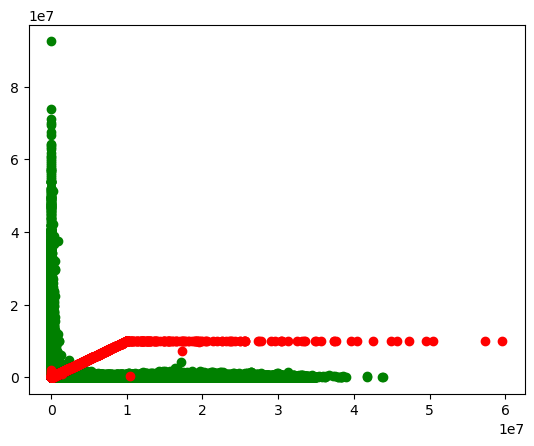

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nonfraud['oldbalanceOrg'],nonfraud['amount'],c='g')
ax.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')
plt.show()

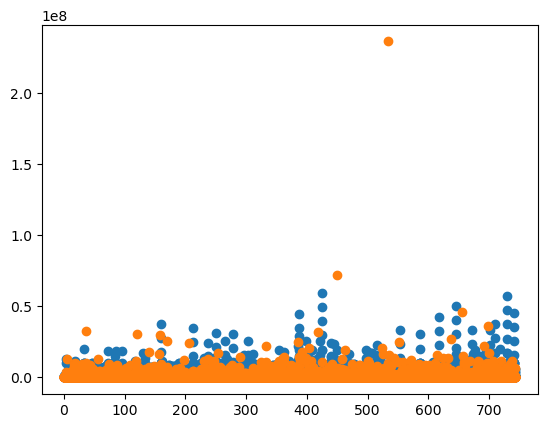

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

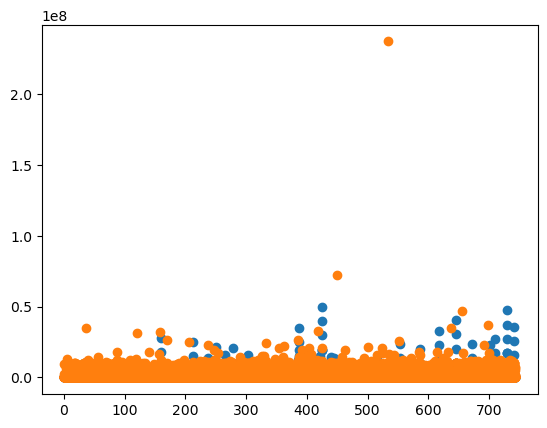

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceDest'])
plt.show()

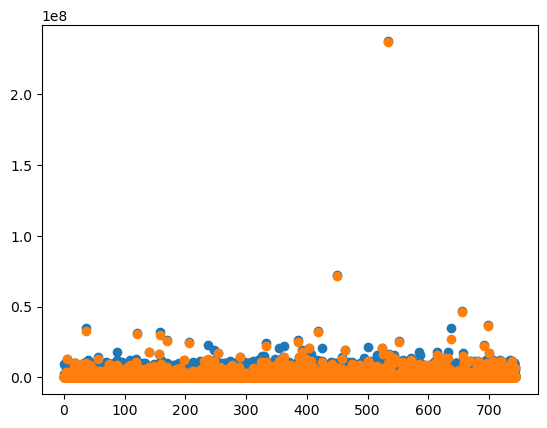

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['newbalanceDest'])
ax.scatter(fraud['step'],fraud['oldbalanceDest'])
plt.show()

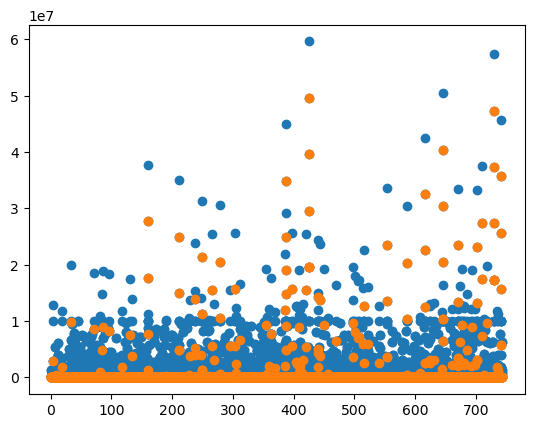

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(fraud['step'],fraud['oldbalanceOrg'])
ax.scatter(fraud['step'],fraud['newbalanceOrg'])
plt.show()

In [18]:
data= data.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3, 'CASH_IN':4,'DEBIT':5,'No':0,'Yes':1})

In [19]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Data Cleaning
nameOrig, nameDest and isFlaggesFraud are not relevent, so it is dropped. It is known that Random Forest uses bootstrap sampling that means row sampling and features or column sampling. So, it is not affected by multicollinearity that much since it is picking different set of features for different Decision Tree model. And it is also known that Random Forest algorithm consist of a large number of Decision Tree model. So after dropping some irreverent features, rest are use as independent variables. 

In [20]:
data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


# Variable Selection
It is known that Random Forest uses bootstrap sampling that means row sampling and features or column sampling. So, it is not affected by multicollinearity that much since it is picking different set of features for different Decision Tree model. And it is also known that Random Forest algorithm consist of a large number of Decision Tree model. So after dropping some irreverent features, rest are use as independent variables. 

In [21]:
x = data.iloc[:,:-1]
y = data[['isFraud']]
x.head()

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest
0,1,1,9839.64,170136.0,160296.36,0.0,0.0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0
2,1,2,181.00,181.0,0.00,0.0,0.0
3,1,3,181.00,181.0,0.00,21182.0,0.0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0


# Machine Learning Model
Split the data set into train and test deta.

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

As it is a classification problem, random forest is selected for fraud detection. Decision Tree, KNN and Logistic Regression etc. all are classification algorithm. But these algorithm affected by outliers and there is a chance of overfitting. But Random Forest is a bagging algorithm, in Random Forest there are multiple Decision Tree with different dataset by row sampling and features sampling. Now the output will combine with bootstrap aggregating, and final result will be selected by majority voting. SO, it will reduce the variance of the output.  So, the problem of overfitting is reduced by using Random Forest.

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)

In [24]:
if True:
    y_predict = clf.fit(x_train, y_train.values.ravel()).predict(x_test)

In [25]:
from sklearn.metrics import average_precision_score
if True:
    print(average_precision_score(y_test,y_predict))

0.7879338032579812


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)

array([[1588573,      37],
       [    398,    1647]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1588610
           1       0.98      0.81      0.88      2045

    accuracy                           1.00   1590655
   macro avg       0.99      0.90      0.94   1590655
weighted avg       1.00      1.00      1.00   1590655



# Performance of the Model

To get even more insight into model performance, we should examine precision, recall, and F1 score. Precision is the number of correctly-identified members of a class divided by all the times the model predicted that class, here precision of fraud detection is 98%. Recall is the number of members of a class that the classifier identified correctly divided by the total number of members in that class, here recall fraud detection is 78%. F1 score is a little less intuitive because it combines precision and recall into one metric here it is 87% for fraud. 

# Sort the data with Feature Importance

In [28]:
importance=clf.feature_importances_
final_df=pd.DataFrame({'Features':x_train.columns,'Importance':importance})
final_df.set_index('Importance')
final_df.sort_values(by="Importance", ascending=False)

,Features,Importance
3,oldbalanceOrg,0.301994
6,newbalanceDest,0.226785
2,amount,0.163126
1,type,0.117682
0,step,0.101404
5,oldbalanceDest,0.058372
4,newbalanceOrg,0.030637


5.The above table it is clear shows the importance of different features to detect the fraud. It is shown that oldbalanceOrg, newbalanceDest are the key factors to predict the fradulent customer. But rest of the features have some importance also. oldbalanceDest and newbalanceOrg have the minimum importance, but we can not drop it, then it may miss the important information as a result the accuracy may reduced.

6.It can say that the key factors for the model are make sense, because of model performance. The model provide a good recall, precision and F1 score with these key factors, and which is capable to detect the fraud transaction.

7. When a request for a transaction is given to the model, it checks for the information like the oldbalanceOrg, then newbalanceDest then type of transaction then amount of transaction then steps, then oldbalanceDest and newbalanceOrg. Through these process it will calculate the probability of fraud or not. If the probability of fraud is greater than 20% percent the  company will stop the transaction to avoid fraudulent.

8.If theIf the probability of the fraud will come under 20% for the new transaction then, it can be said that the model is implemented properly. 

# Now, let’s visualize

In [29]:
from sklearn import tree
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

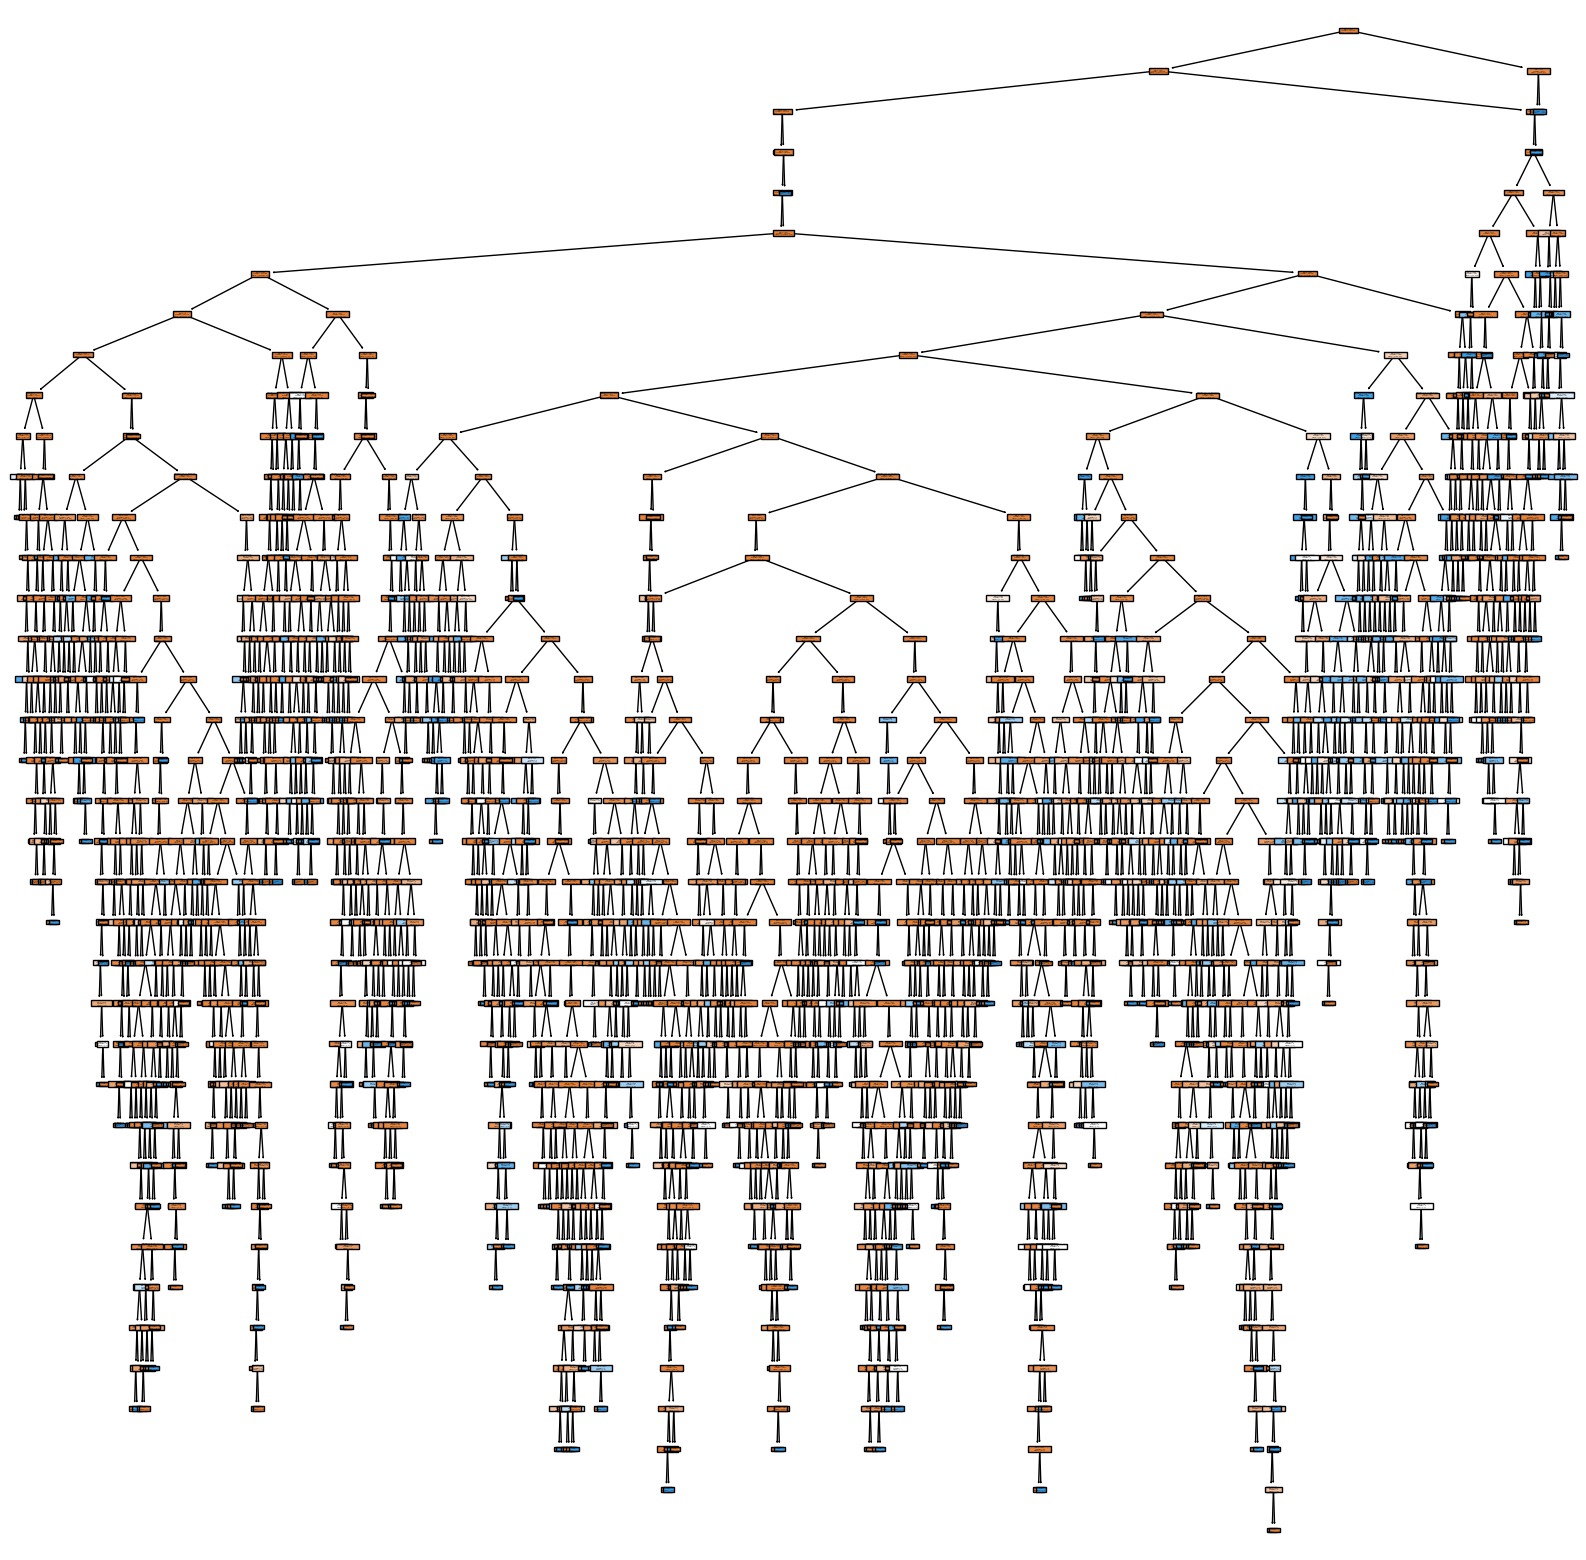

In [30]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(clf.estimators_[0], feature_names=x.columns, filled=True)


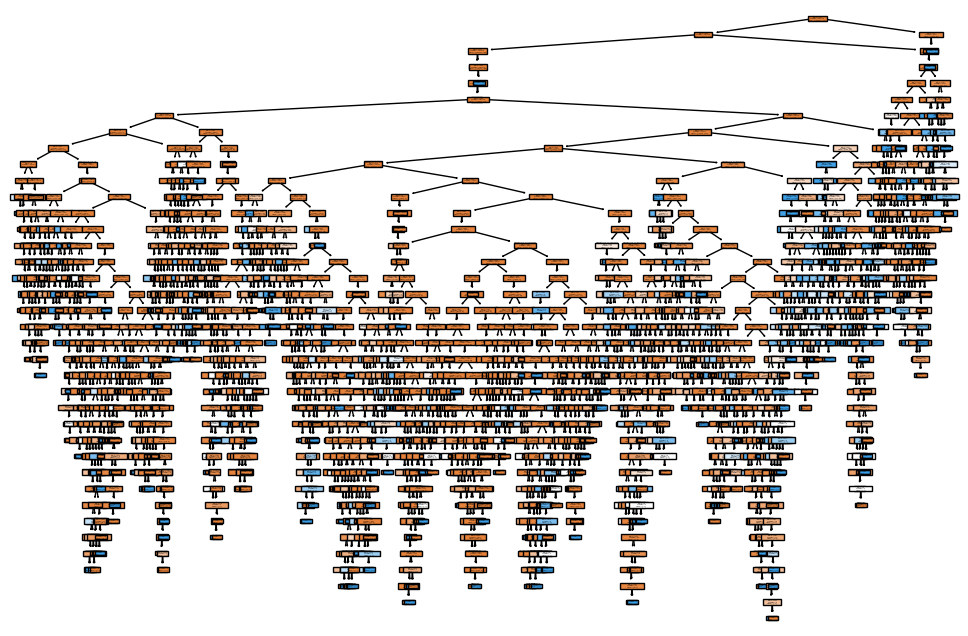

In [31]:
_ = tree.plot_tree(clf.estimators_[0], feature_names=x.columns, filled=True)


# Predict With New Data

In [51]:
newdata=x.iloc[1:2,:]
newdata

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest
1,1,1,1864.28,21249.0,19384.72,0.0,0.0


In [52]:
if True:
    y_new = clf.fit(x_train, y_train.values.ravel()).predict(newdata)

In [53]:
y_new

array([0], dtype=int64)

# Pickling The Model File For Deployment

In [54]:
import pickle

In [55]:
pickle.dump(clf,open('randomforestclassifier.pkl','wb'))

In [56]:
pickle_model=pickle.load(open('randomforestclassifier.pkl','rb'))

In [57]:
pickle_model.predict(newdata)

array([0], dtype=int64)

In [58]:
import os
os.getcwd()

'E:\\DATA\\Assignments\\INSAID'